<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/Multi_Linear_Regression_(ToyotaCorolla).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
files=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv("ToyotaCorolla.csv",encoding = "latin1")
data.head()

,Id,Model,Price,Age,MfgMonth,MfgYear,KM,FuelType,HP,MetColor,Color,Automatic,cc,Doors,Cylinders,Gears,QuarterlyTax,Weight,MfrGuarantee,BOVAGGuarantee,GuaranteePeriod,ABS,Airbag1,Airbag2,Airco,Automaticairco,Boardcomputer,CDPlayer,CentralLock,PoweredWindows,PowerSteering,Radio,Mistlamps,SportModel,BackseatDivider,MetallicRim,Radiocassette,TowBar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [51]:
toyota1= data.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [52]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         1436 non-null   int64
 1   Age           1436 non-null   int64
 2   KM            1436 non-null   int64
 3   HP            1436 non-null   int64
 4   cc            1436 non-null   int64
 5   Doors         1436 non-null   int64
 6   Gears         1436 non-null   int64
 7   QuarterlyTax  1436 non-null   int64
 8   Weight        1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [53]:
toyota1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QuarterlyTax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QuarterlyTax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


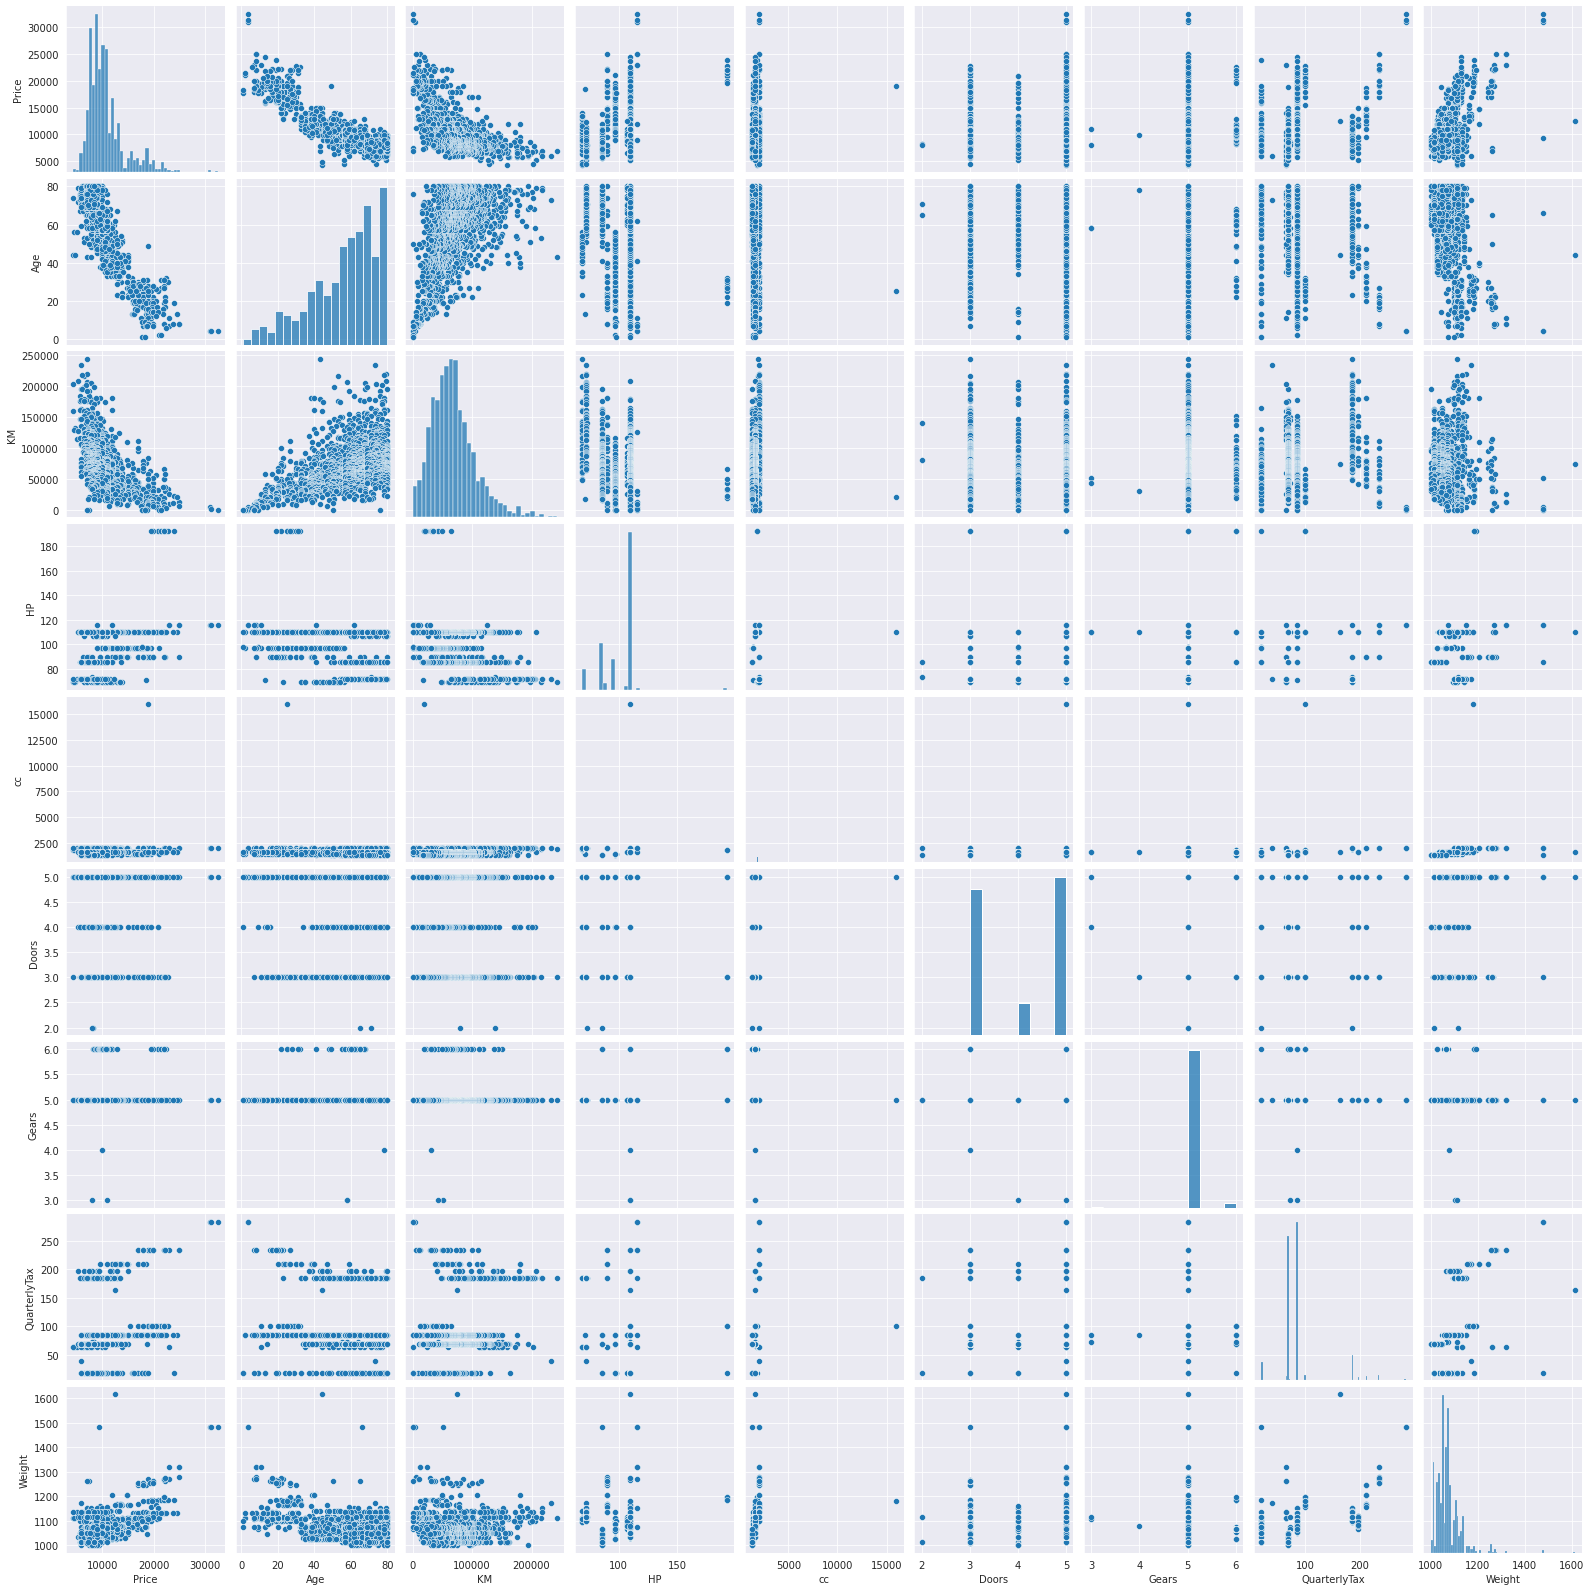

In [54]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(toyota1)

In [55]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~	Age+KM+HP+cc+Doors+Gears+QuarterlyTax+Weight',data=toyota1).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:12:07   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age           -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM              -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP              31.6809      2.818     11.241      0.000      26.152      37.209
cc              -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors           -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears          594.3199    197.055      3.016      0.003     207.771     980.869
QuarterlyTax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight          16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

In [58]:
data1 = add_constant(toyota1)

In [59]:
vif1df = pd.DataFrame()
vif1df["Factors"] = [vif(data1.values, i) for i in range(data1.shape[1])]
vif1df["Features"] = data1.columns
vif1df

,Factors,Features
0,1604.565630,const
1,7.340136,Price
2,4.741730,Age
3,2.097055,KM
4,1.545112,HP
5,1.165368,cc
6,1.156577,Doors
7,1.105727,Gears
8,2.326150,QuarterlyTax
9,2.961102,Weight


In [60]:
#SLR
m1 = smf.ols('Price~cc',data=toyota1).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.55e-06
Time:                        15:12:44   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
m2 = smf.ols('Price~Doors',data=toyota1).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.46e-12
Time:                        15:12:48   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
m3 = smf.ols('Price~cc+Doors',data=toyota1).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           1.15e-15
Time:                        15:12:51   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
toyota2=toyota1.drop(['Doors'],axis=1)

In [64]:
toyota2

,Price,Age,KM,HP,cc,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,5,210,1165
1,13750,23,72937,90,2000,5,210,1165
2,13950,24,41711,90,2000,5,210,1165
3,14950,26,48000,90,2000,5,210,1165
4,13750,30,38500,90,2000,5,210,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,5,69,1025
1432,10845,72,19000,86,1300,5,69,1015
1433,8500,71,17016,86,1300,5,69,1015
1434,7250,70,16916,86,1300,5,69,1015


In [65]:
k = toyota2.shape[1]
n = toyota2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.018802228412256268

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


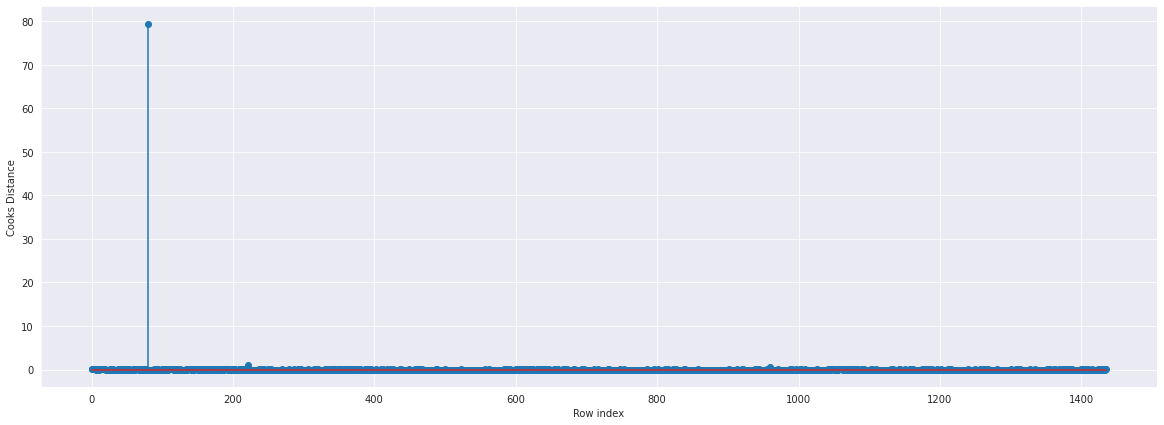

In [66]:
#Plot the influencers values using stem plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
#index and value of influencer where c is more than .2
(np.argmax(c),np.max(c))

(80, 79.52010624141955)

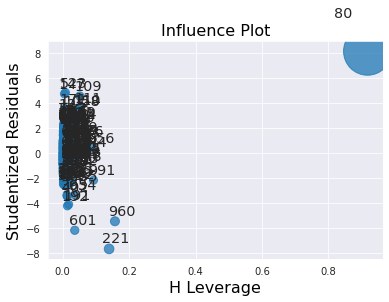

In [68]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [69]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota3=toyota2.drop(toyota2.index[[80]],axis=0).reset_index()

In [70]:
#Drop the original index

toyota3=toyota3.drop(['index'],axis=1)

In [71]:
toyota3

,Price,Age,KM,HP,cc,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,5,210,1165
1,13750,23,72937,90,2000,5,210,1165
2,13950,24,41711,90,2000,5,210,1165
3,14950,26,48000,90,2000,5,210,1165
4,13750,30,38500,90,2000,5,210,1170
...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,5,69,1025
1431,10845,72,19000,86,1300,5,69,1015
1432,8500,71,17016,86,1300,5,69,1015
1433,7250,70,16916,86,1300,5,69,1015


In [72]:
fmodel = smf.ols('Price~Age+KM+HP+cc+Gears+QuarterlyTax+Weight',data=toyota3).fit()

In [73]:
fmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:13:49   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age           -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM              -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP              39.1593      2.898     13.512      0.000      33.474      44.844
cc              -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears          549.7311    189.216      2.905      0.004     178.561     920.902
QuarterlyTax     9.0759      1.424      6.374      0.000       6.283      11.869
Weight          19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Price = -6313.94 - 120.46(Age) - 0.12(KM) + 39.16(HP) - 2.51(CC) + 549.73(Gears) + 9.08(Quarterly Tax) + 20(Weight)


In [74]:
# split the data into train and test

from sklearn.model_selection import train_test_split

train_data,test_data=train_test_split(toyota3,test_size=0.3)

In [75]:
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))
  
def MAPE(pred,actual):
      return np.mean((np.abs(actual-pred)/actual))*100

In [76]:
#train the model using training data
train_model=smf.ols('Price~Age+KM+HP+cc+Gears+QuarterlyTax+Weight',data= train_data).fit()
predtrain=train_model.predict(train_data)
actualtrain=train_data.Price
errors_train=predtrain-actualtrain
mape_train=MAPE(predtrain,actualtrain)
mape_train

9.398755217612202

In [77]:
predtest=train_model.predict(test_data)
actualtest=test_data.Price

mape_test=MAPE(predtest,actualtest)
mape_test

9.847831744640418